In [11]:
import xarray as xr
import pandas as pd
import numpy as np
import warnings
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Read in NDVI data

In [2]:
ds=xr.open_mfdataset(
    '/g/data/oe9/user/rg6346/VI_mask_nc/NDVI/NDVI_????.nc',
    chunks=dict(long=176)) 
ds=ds.rename({'ndvi_evi':'ndvi'})
ds=ds.drop('band')
ds['ndvi']=ds.ndvi/10000;
ds

<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 388)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi     (time, lat, long) float64 dask.array<shape=(388, 3147, 3344), chunksize=(20, 3147, 176)>

### Resample to quarterly, extract seasons

In [77]:
ndvi_q=ds.ndvi.resample(time='Q-FEB').mean(dim='time')
ndvi_jja=ndvi_q.where(ndvi_q['time.season']=='JJA',drop=True)
ndvi_djf=ndvi_q.where(ndvi_q['time.season']=='DJF',drop=True)
ndvi_jja.name='NDVI'
ndvi_djf.name='NDVI'


/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


## Plot ndvi as time series

In [38]:
#testing how to convert date to string

#import datetime as dt
type(ndvi_jja.isel(time=0).time.data)

# test =np.array(ndvi_jja.isel(time=0).time.values, dtype = 'datetime64[D]')
#wet_dt=np.array(wet_yrs.time.values,dtype = 'datetime64[Y]')
# str(test)

t=pd.to_datetime(ndvi_jja.time.values) 

timestring = t.strftime('%Y')
timestring

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype='<U4')

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5,1,'Winter (JJA) 2016')

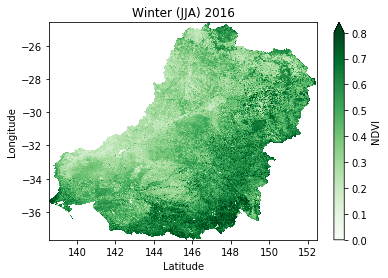

In [73]:
##test single

fig=plt.figure()
ndvi_jja.isel(time=1).plot.imshow(robust=True,cmap='Greens',vmin=0,vmax=.8)
#     plt.axes().set_aspect('equal', 'datalim')    

plt.xlabel('Latitude')
plt.ylabel('Longitude')

t=pd.to_datetime(step.values) 
timestring = t.strftime('%Y')
plt.title('Winter (JJA) '+timestring)

## Create figs in loop

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


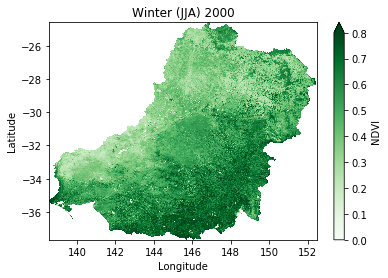

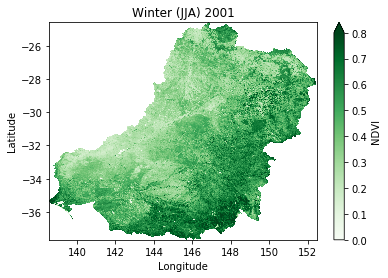

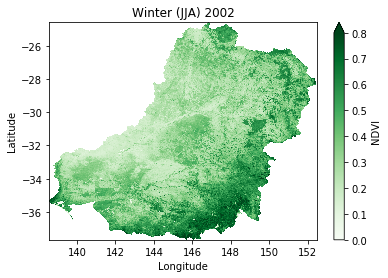

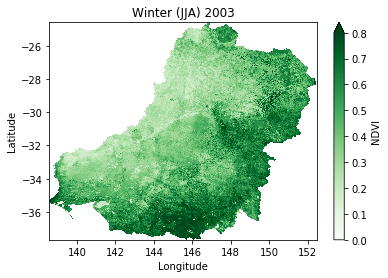

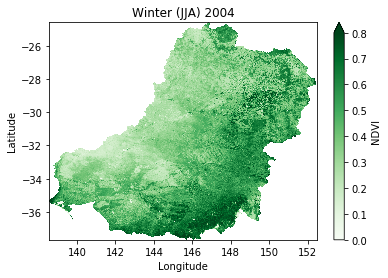

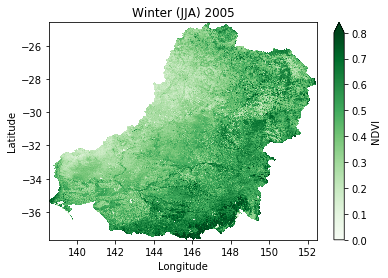

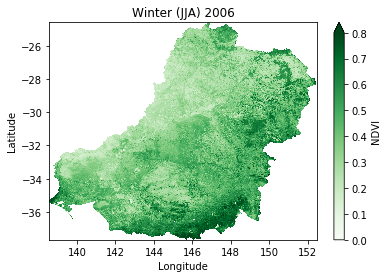

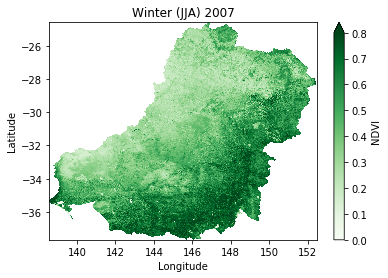

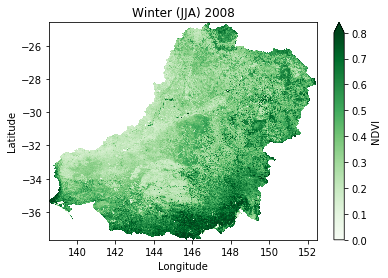

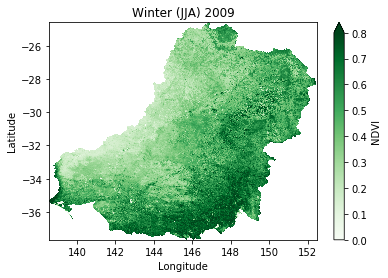

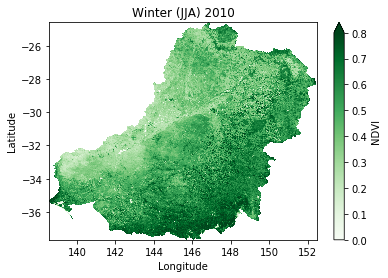

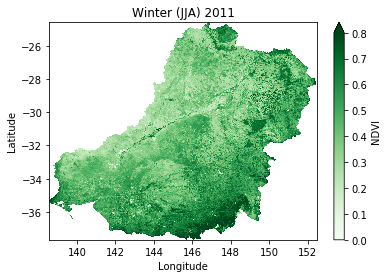

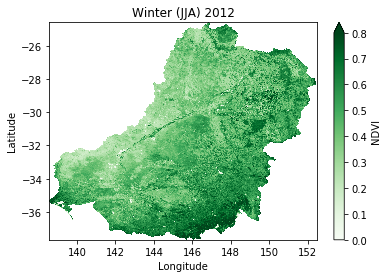

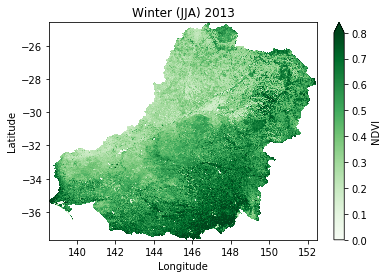

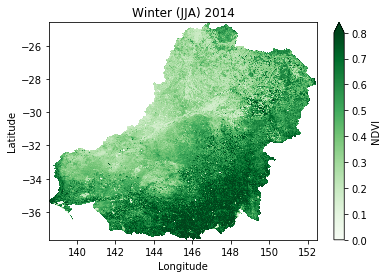

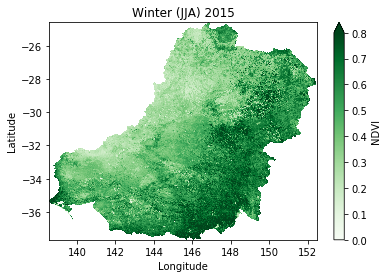

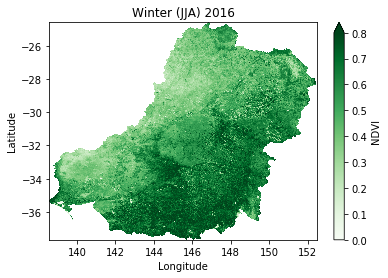

In [82]:
## plot winter in loop
save_path = '/home/156/jbw156/team-drip/figures/jja_ndvi/'
for step in ndvi_jja.time:
    fig=plt.figure()
    ndvi_jja.sel(time=step).plot.imshow(robust=True,cmap='Greens',vmin=0,vmax=.8)
#     plt.axes().set_aspect('equal', 'datalim')    
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    t=pd.to_datetime(step.values) 
    timestring = t.strftime('%Y')
    plt.title('Winter (JJA) '+timestring)
    
    completeName = os.path.join(save_path,"{y}jja_ndvi.png".format(y=timestring))  
    plt.savefig(completeName)
    plt.clf
#     print(timestring)

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


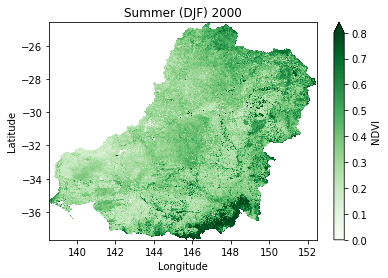

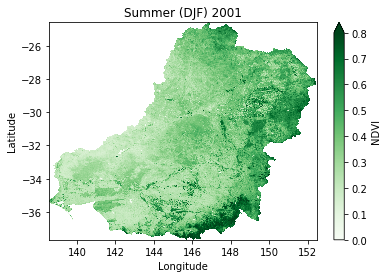

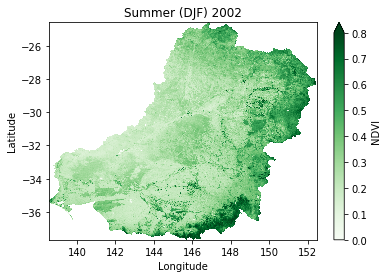

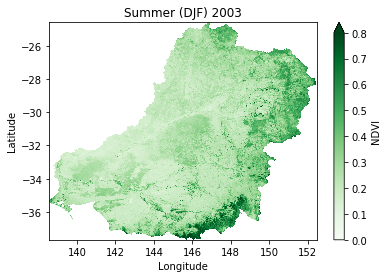

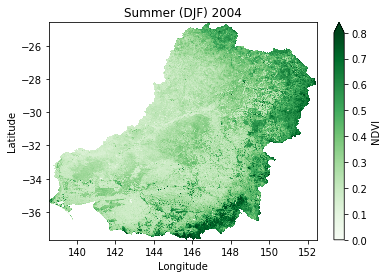

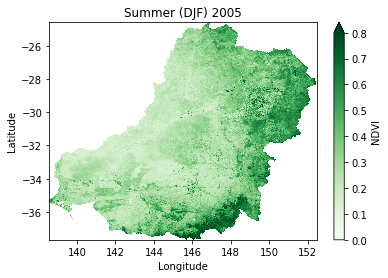

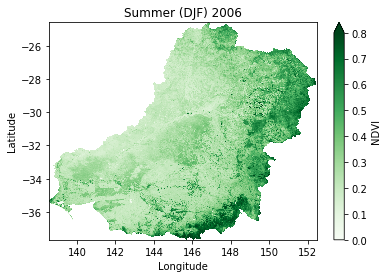

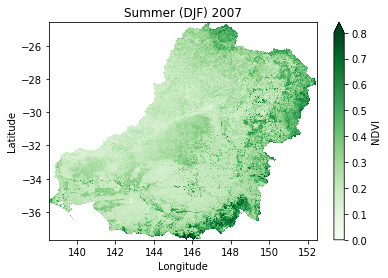

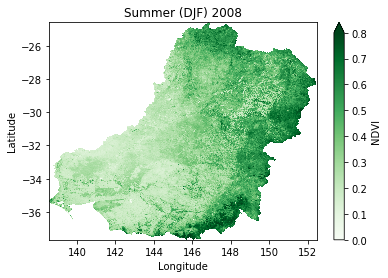

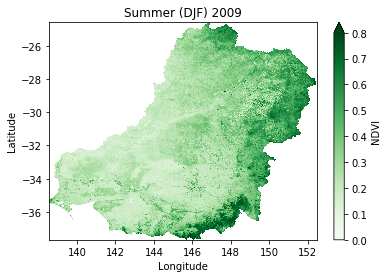

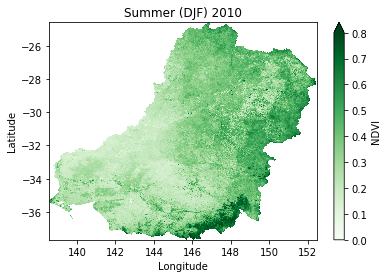

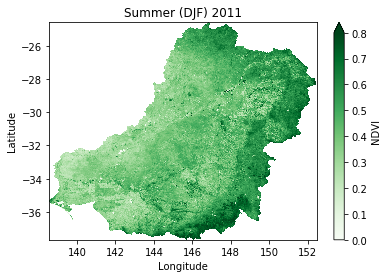

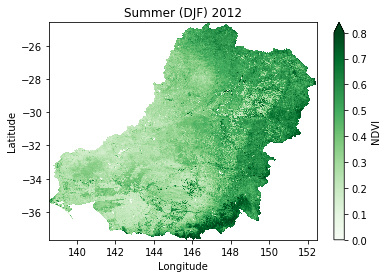

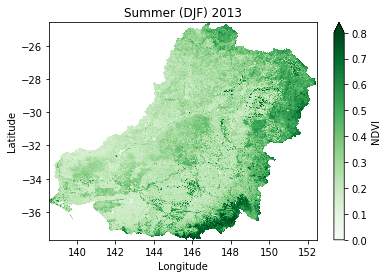

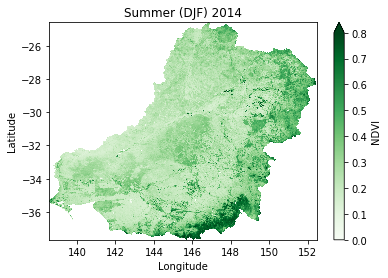

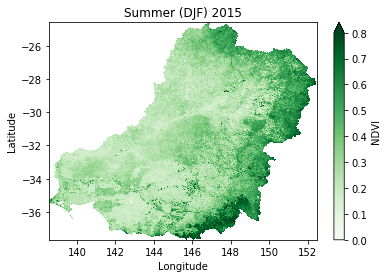

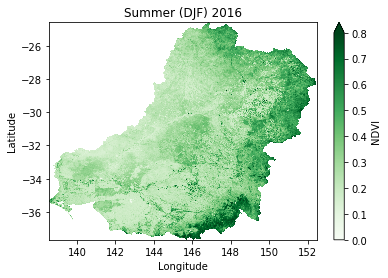

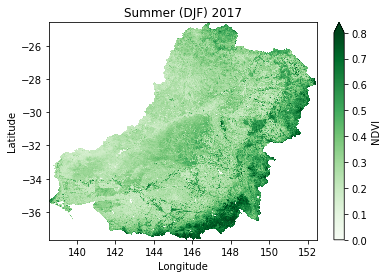

In [83]:
## plot summer in loop

save_path = '/home/156/jbw156/team-drip/figures/djf_ndvi/'
for step in ndvi_djf.time:
    fig=plt.figure()
    ndvi_djf.sel(time=step).plot.imshow(robust=True,cmap='Greens',vmin=0,vmax=.8)
#     plt.axes().set_aspect('equal', 'datalim')    
     
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    t=pd.to_datetime(step.values) 
    timestring = t.strftime('%Y')
    plt.title('Summer (DJF) '+timestring)
    
    completeName = os.path.join(save_path,"{y}djf_ndvi.png".format(y=timestring))  
    plt.savefig(completeName)
    plt.clf

## Plot seasonal variance

In [78]:
##Calculate and plot seasonal variance
ndvi_jja_std=ndvi_jja.std(dim='time')
ndvi_djf_std=ndvi_djf.std(dim='time')


In [79]:
both = xr.concat([ndvi_djf_std, ndvi_jja_std],dim=pd.Series(['DJF', 'JJA'], name='season', dtype='U'))
both

<xarray.DataArray 'NDVI' (season: 2, lat: 3147, long: 3344)>
dask.array<shape=(2, 3147, 3344), dtype=float64, chunksize=(1, 3147, 176)>
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * season   (season) object 'DJF' 'JJA'

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/reductions.py:297: RuntimeWarning: invalid value encountered in true_divide
  u = total / n


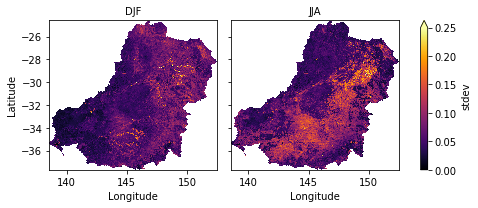

In [84]:
%%time
##this takes a while
cmap='inferno'
vmin=0
vmax=.25

fig=plt.figure()
j = both.plot.imshow(col='season', robust=True,cmap=cmap,vmin=vmin, vmax=vmax)
j.cbar.set_label('stdev')
j.set_xlabels('Longitude')
j.set_ylabels('Latitude')
j.set_titles(template='{value}')
# fig.suptitle('Variance 2001-2016')

plt.ioff()

path='/home/156/jbw156/team-drip/figures/MDBA_seasonalvariance.png'
plt.savefig(path,dpi=300,bbox_inches='tight')

In [92]:
ndvi_mean=ndvi_q.mean(dim='time')
ndvi_mean

<xarray.DataArray 'ndvi' (lat: 3147, long: 3344)>
dask.array<shape=(3147, 3344), dtype=float64, chunksize=(3147, 176)>
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...

In [93]:
## plot summer in loop

save_path = '/home/156/jbw156/team-drip/figures/djf_ndvi/'
for step in ndvi_djf.time:
    fig=plt.figure()
    anomaly=ndvi_q.sel(time=step)-ndvi_mean
    anomaly.plot.imshow(robust=True,cmap='Greens',vmin=0,vmax=.8)
#     plt.axes().set_aspect('equal', 'datalim')    
     
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    t=pd.to_datetime(step.values) 
    timestring = t.strftime('%Y')
    plt.title('NDVI anomaly '+timestring)
    
#     completeName = os.path.join(save_path,"{y}djf_ndvi.png".format(y=timestring))  
#     plt.savefig(completeName)
#     plt.clf

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 

In [ ]:
# Change in vraiance

In [98]:
ndvi_q=ds.ndvi.resample(time='1A').std(dim='time')

baseline=ndvi_q.mean(dim='time')

## Yatrie anomaly loop
save_path = '/home/156/jbw156/team-drip/figures/all_d_var/'
for i,step in enumerate(ndvi_q.time):
    
    fig=plt.figure()
    anomaly=ndvi_q.sel(time=step)-baseline
    j = anomaly.plot.imshow(robust=True,cmap='bwr',vmin=-.1,vmax=.1)
#     plt.axes().set_aspect('equal', 'datalim')    
    j.colorbar.set_label('stdev anomaly')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    t=pd.to_datetime(step.values) 
    timestring = t.strftime('%Y')
#     season=seas.data[i]
#     plt.title(season+' ' +timestring)
    plt.title(timestring)
    #   timestring2 = t.strftime('%Y%m')
 

    completeName = os.path.join(save_path,"{y}all_ndvi_annvar.png".format(y=timestring))  
    plt.savefig(completeName)
    plt.close
#     print(timestring)

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/reductions.py:297: RuntimeWarning: invalid value encountered in true_divide
  u = total / n
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 